In [1]:
import pandas as pd
df = pd.read_csv('framingham_heart_disease.csv')

In [2]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [3]:
df = df.dropna()
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [4]:
df.shape

(3656, 16)

In [5]:
import numpy as np 
import math 
import pandas as pd

In [6]:
data1 = df['heartRate'].head(30)
print(data1)

0     80.0
1     95.0
2     75.0
3     65.0
4     85.0
5     77.0
6     60.0
7     79.0
8     76.0
9     93.0
10    75.0
11    72.0
12    98.0
13    65.0
15    95.0
16    64.0
17    80.0
18    75.0
19    85.0
20    72.0
22    70.0
23    71.0
24    75.0
25    62.0
27    73.0
28    85.0
29    72.0
30    60.0
31    75.0
32    90.0
Name: heartRate, dtype: float64


In [7]:
data2=np.sort(data1)
print(data2)

[60. 60. 62. 64. 65. 65. 70. 71. 72. 72. 72. 73. 75. 75. 75. 75. 75. 76.
 77. 79. 80. 80. 85. 85. 85. 90. 93. 95. 95. 98.]


In [8]:
# 1. Binning with means and/or mode, boundary
bin1 = slice(0,10)
bin2 = slice(10,20)
bin3 = slice(20,30)
print("bin1 = ",data2[bin1])
print("bin2 = ",data2[bin2])
print("bin3 = ",data2[bin3])

bin1 =  [60. 60. 62. 64. 65. 65. 70. 71. 72. 72.]
bin2 =  [72. 73. 75. 75. 75. 75. 75. 76. 77. 79.]
bin3 =  [80. 80. 85. 85. 85. 90. 93. 95. 95. 98.]


In [9]:
b1=np.zeros((3,10))
b2=np.zeros((3,10))
b3=np.zeros((3,10))

In [10]:
for i in range (0,30,10): 
  k=int(i/10)
  mean=(data2[i] + data2[i+1] + data2[i+2] + data2[i+3] + data2[i+4] + data2[i+5] + data2[i+6] + data2[i+7] + data2[i+8] + data2[i+9])/10
  for j in range(10): 
    b1[k,j]=mean 
print("-----------------Mean of bins :----------------- \n",b1)

-----------------Mean of bins :----------------- 
 [[66.1 66.1 66.1 66.1 66.1 66.1 66.1 66.1 66.1 66.1]
 [75.2 75.2 75.2 75.2 75.2 75.2 75.2 75.2 75.2 75.2]
 [88.6 88.6 88.6 88.6 88.6 88.6 88.6 88.6 88.6 88.6]]


In [11]:
for i in range (0,30,10): 
  k=int(i/10) 
  for j in range (10): 
    b2[k,j] = data2[i+1] 
print("-----------------Median Bin :----------------- \n",b2)

-----------------Median Bin :----------------- 
 [[60. 60. 60. 60. 60. 60. 60. 60. 60. 60.]
 [73. 73. 73. 73. 73. 73. 73. 73. 73. 73.]
 [80. 80. 80. 80. 80. 80. 80. 80. 80. 80.]]


In [12]:
for i in range (0,30,10): 
  k=int(i/10) 
  for j in range (10): 
    if (data2[i+j]-data2[i]) < (data2[i+9]-data2[i+j]): 
      b3[k,j]=data2[i] 
    else: 
      b3[k,j]=data2[i+9]   
print("-----------------Boundary Bin:----------------- \n",b3)

-----------------Boundary Bin:----------------- 
 [[60. 60. 60. 60. 60. 60. 72. 72. 72. 72.]
 [72. 72. 72. 72. 72. 72. 72. 79. 79. 79.]
 [80. 80. 80. 80. 80. 98. 98. 98. 98. 98.]]


In [13]:
a = df['age'].head(10)
a

0    39
1    46
2    48
3    61
4    46
5    43
6    63
7    45
8    52
9    43
Name: age, dtype: int64

In [14]:
b = df['totChol'].head(10)
b

0    195.0
1    250.0
2    245.0
3    225.0
4    285.0
5    228.0
6    205.0
7    313.0
8    260.0
9    225.0
Name: totChol, dtype: float64

**covariance(cov)
<br>Cov(x,y) = [ Σ(Xi - x)(Yi - y) ] / n - 1
<br>x and y are means**

In [15]:
# Covariance

# Finding the mean of the series a and b
mean_a = sum(a)/float(len(a))
mean_b = sum(b)/float(len(b))
print("Mean of a:", mean_a)
print("Mean of b:", mean_b)

# Subtracting mean from the individual elements
sub_a = [i - mean_a for i in a]
sub_b = [i - mean_b for i in b]

numerator = sum([sub_a[i]*sub_b[i] for i in range(len(sub_a))])
denominator = len(a)-1
print("numerator:",numerator)
print("denominator:",denominator)

cov = numerator/denominator
print("Covariance:", cov)

Mean of a: 48.6
Mean of b: 243.1
numerator: -447.6
denominator: 9
Covariance: -49.733333333333334


**correlation(r)
<br>r(x,y) = cov(x,y)/SxSy
<br>Sx and Sy are standard deviation**

In [16]:
import statistics

In [17]:
print(statistics.stdev(a))

7.848566748139434


In [18]:
print(statistics.stdev(b))

35.942701314422344


In [19]:
# Correlation

# Finding the mean of the series a and b
mean_a = sum(a)/float(len(a))
mean_b = sum(b)/float(len(b))

# Subtracting mean from the individual elements
sub_a = [i-mean_a for i in a]
sub_b = [i-mean_b for i in b]
# covariance for a and b
numerator_Covariance = (sum([sub_a[i]*sub_b[i] for i in range(len(sub_a))]))/(len(a)-1)
print("Covariance:",numerator_Covariance)

# Standard Deviation of a and b
# squaring by 0.5 to find the square root
std_deviation_a = ((sum([sub_a[i]**2.0 for i in range(len(sub_a))]))/float(len(a)-1))**0.5
std_deviation_b = ((sum([sub_b[i]**2.0 for i in range(len(sub_b))]))/float(len(b)-1))**0.5
print("standard deviation of a:", std_deviation_a)
print("standard deviation of b:", std_deviation_b)
denominator = (std_deviation_a * std_deviation_b)

cor = numerator_Covariance/denominator
print("Correlation:", cor)

Covariance: -49.733333333333334
standard deviation of a: 7.848566748139433
standard deviation of b: 35.94270131442235
Correlation: -0.17629763990494834


**Plot the correlation, to show whether two variables are positively correlated, negatively correlated or no relation between them.**

In [20]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
y = df['totChol']
x = df['age']
correlation = y.corr(x)
correlation

0.2677636840105785

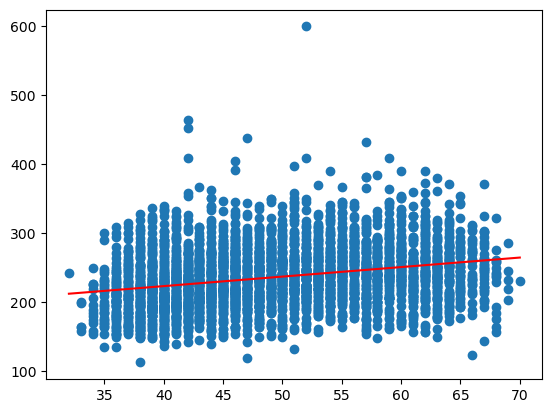

In [22]:
# plotting the data
plt.scatter(x, y)
 
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')